In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

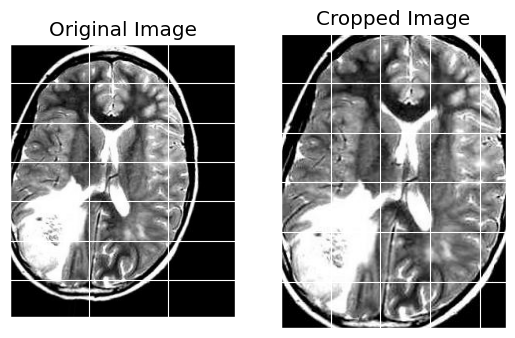

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [3]:
img = cv2.imread('augmented_data/yes/aug_Y_1_0_345.jpg')
crop_brain_tumor(img, True)

In [4]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]
    
    image_width, image_height=image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)
    
    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y
            

In [5]:
augmented_path = 'augmented_data/'
augmeneted_yes = augmented_path + 'yes'
augmeneted_no = augmented_path + 'no'

IMAGE_WIDTH, IMAGE_HEIGHT = (120,120)

X,y = load_data([augmeneted_yes, augmeneted_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of example is : 23994
X SHAPE is : (23994, 120, 120, 3)
y SHAPE is : (23994,)


In [6]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

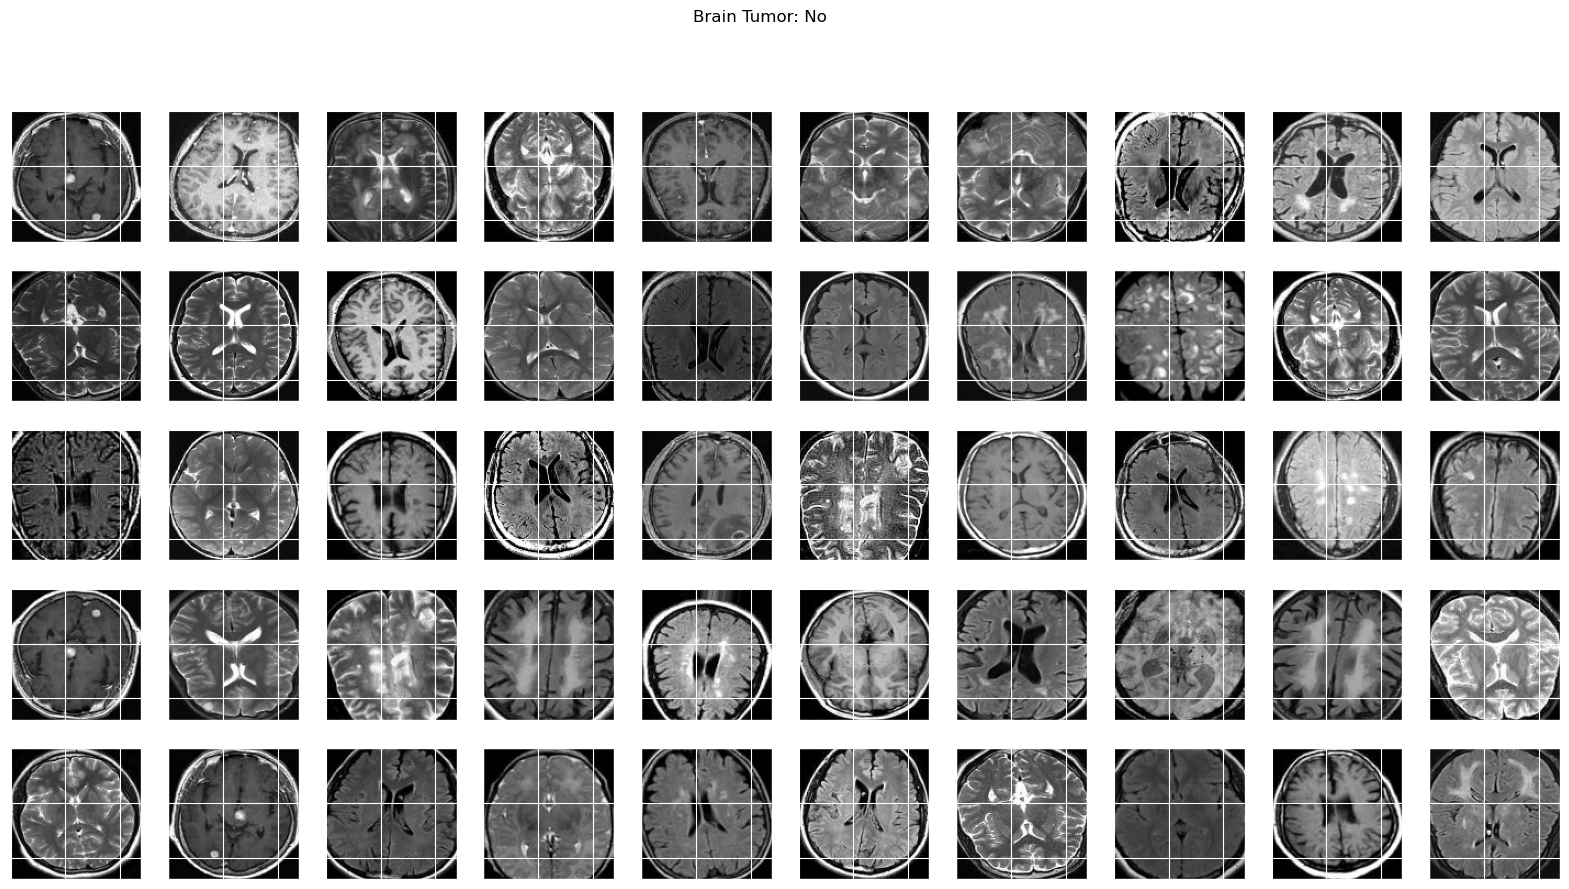

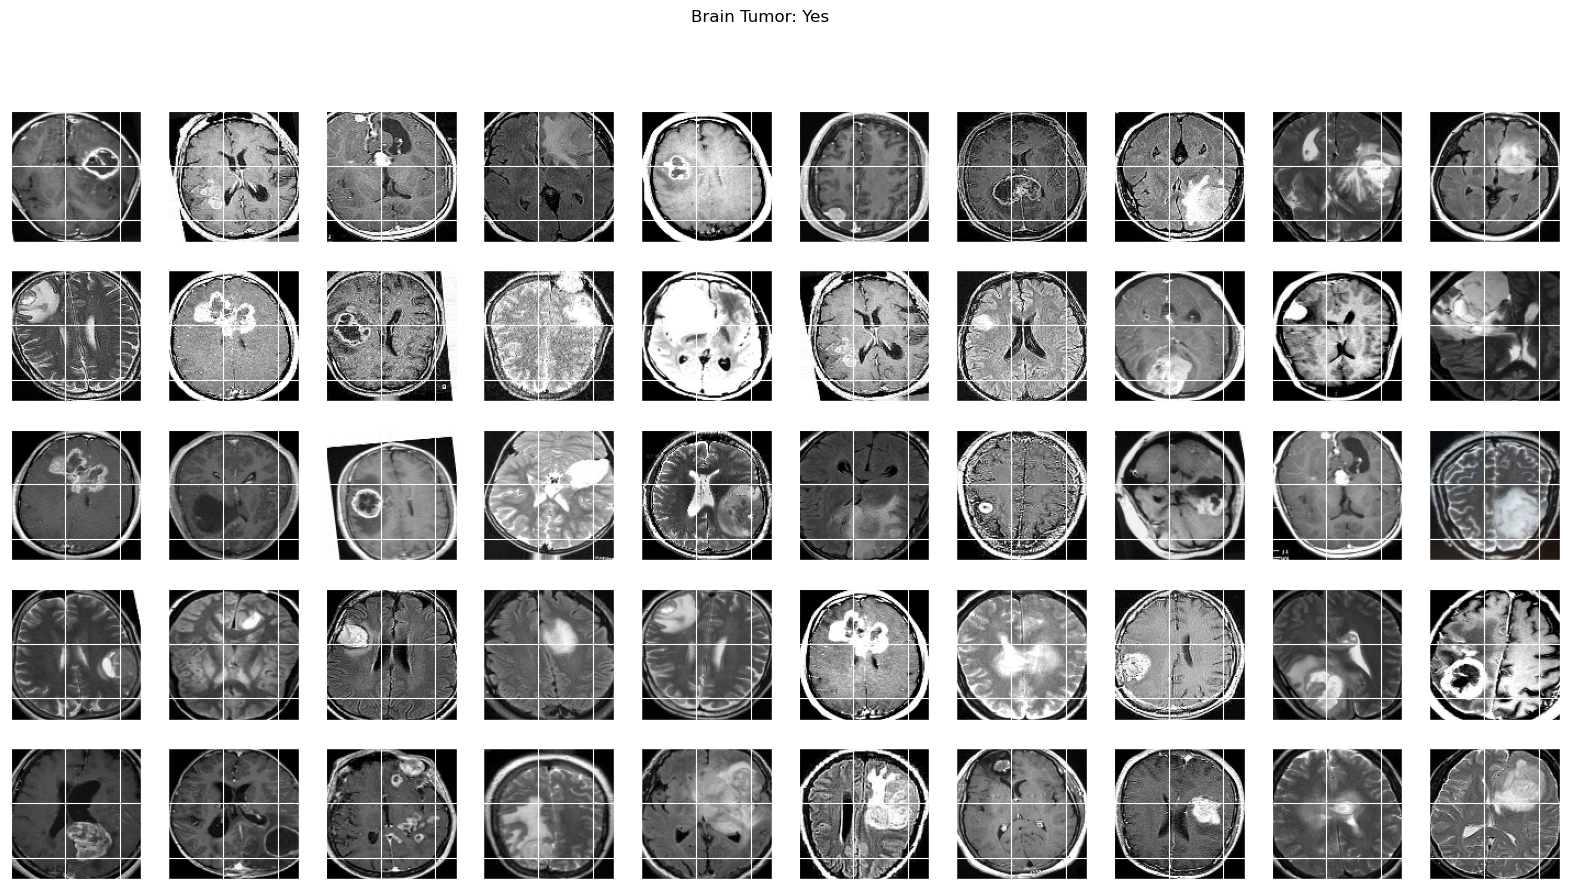

In [7]:
plot_sample_images(X,y)

In [9]:
from sklearn.model_selection import train_test_split
def split_data(X,y,test_size=0.2):
    X_train,X_test_val,y_train,y_test_val=train_test_split(X,y,test_size=test_size)
    X_test,X_val,y_test,y_val=train_test_split(X_test_val,y_test_val,test_size=0.5)
    return X_train,y_train,X_val,y_val,X_test,y_test

In [12]:
X_train,y_train,X_val,y_val,X_test,y_test=split_data(X,y,test_size=0.2)

In [13]:
print("number of training examples = "+str(X_train.shape[0]))
print("number of validation examples = "+str(X_val.shape[0]))
print("number of test examples = "+str(X_test.shape[0]))
print("X_train shape = "+str(X_train.shape))
print("Y_train shape = "+str(y_train.shape))
print("X_val shape = "+str(X_val.shape))
print("Y_val shape = "+str(y_val.shape))
print("X_test shape = "+str(X_test.shape))
print("Y_test shape = "+str(y_test.shape))

number of training examples = 19195
number of validation examples = 2400
number of test examples = 2399
X_train shape = (19195, 120, 120, 3)
Y_train shape = (19195,)
X_val shape = (2400, 120, 120, 3)
Y_val shape = (2400,)
X_test shape = (2399, 120, 120, 3)
Y_test shape = (2399,)


In [14]:
import os
import shutil
import numpy as np

# Create directories for storing split data
def create_split_folders(base_dir):
    for folder in ['train', 'val', 'test']:
        path = os.path.join(base_dir, folder)
        if not os.path.exists(path):
            os.makedirs(path)

# Save data into respective directories
def save_split_data(X, y, base_dir, folder_name):
    folder_path = os.path.join(base_dir, folder_name)
    for i, (image, label) in enumerate(zip(X, y)):
        label_folder = os.path.join(folder_path, str(label))
        if not os.path.exists(label_folder):
            os.makedirs(label_folder)
        # Assuming X is an array of images and y contains the labels
        file_path = os.path.join(label_folder, f'image_{i}.npy')
        np.save(file_path, image)  # Save as .npy files

# Base directory where data will be stored
base_dir = './split_data'
create_split_folders(base_dir)

# Save training, validation, and test data
save_split_data(X_train, y_train, base_dir, 'train')
save_split_data(X_val, y_val, base_dir, 'val')
save_split_data(X_test, y_test, base_dir, 'test')

print("Data saved successfully into train, val, and test folders.")


Data saved successfully into train, val, and test folders.


In [30]:
best_model.metrics_names

['loss', 'compile_metrics']

In [31]:
metrics = best_model.evaluate(x=X_test, y=y_test)
loss = metrics[0]
accuracy = metrics[1]
auc = metrics[2]

print(f'Loss: {loss}, Accuracy: {accuracy}, AUC: {auc}')

75/75 ━━━━━━━━━━━━━━━━━━━━ 50s 663ms/step - AUC: 0.9993 - accuracy: 0.9948 - loss: 0.0166
Loss: 0.015085081569850445, Accuracy: 0.9958316087722778, AUC: 0.9994629621505737


In [32]:
print (f"Test Loss = {loss}")
print (f"Test Accuracy = {accuracy}")

Test Loss = 0.015085081569850445
Test Accuracy = 0.9958316087722778


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

predictions_prob = model.predict(X_test)
predictions = [1 if x > 0.5 else 0 for x in predictions_prob]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions)


75/75 ━━━━━━━━━━━━━━━━━━━━ 50s 661ms/step
Test Accuracy = 1.00


In [34]:
confusion_mtx

array([[1167,    2],
       [   8, 1222]], dtype=int64)